In [2]:
%matplotlib inline
import yt
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt
from scipy.optimize import brentq

from galaxy_analysis.utilities import utilities

from galaxy_analysis.plot.plot_styles import *
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.utilities import functions
from galaxy_analysis.particle_analysis import particle_types as ptypes

import time


/home/emerick/anaconda2/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "
/home/emerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module

/home/emerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477

/home/emerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in star

In [3]:
gal = Galaxy('DD0349')

Parsing Hierarchy : 100%|██████████| 3845/3845 [00:00<00:00, 14199.51it/s]
/home/emerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
129 abundance ratio fields defined
129 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 3845/3845 [00:00<00:00, 15432.35it/s]
/home/emerick/code/onezone/data_tables.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [5]:
gal.df[('io','particle_model_lifetime')]

YTArray([ 6778.99781327,  6393.06640062,  4118.64806273, ...,
          6665.62430861,  6694.0330333 ,  2401.17473882]) Myr

In [6]:
data = dd.io.load('gas_abundances.h5')

Molecular DD0046 failure


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in divide
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in divide
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in less


HIM DD0046 failure
Molecular DD0047 failure
Molecular DD0048 failure
Molecular DD0049 failure
HIM DD0049 failure
Molecular DD0050 failure
WIM DD0050 failure
HIM DD0050 failure
Molecular DD0051 failure
HIM DD0051 failure


/home/emerick/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in divide
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in divide


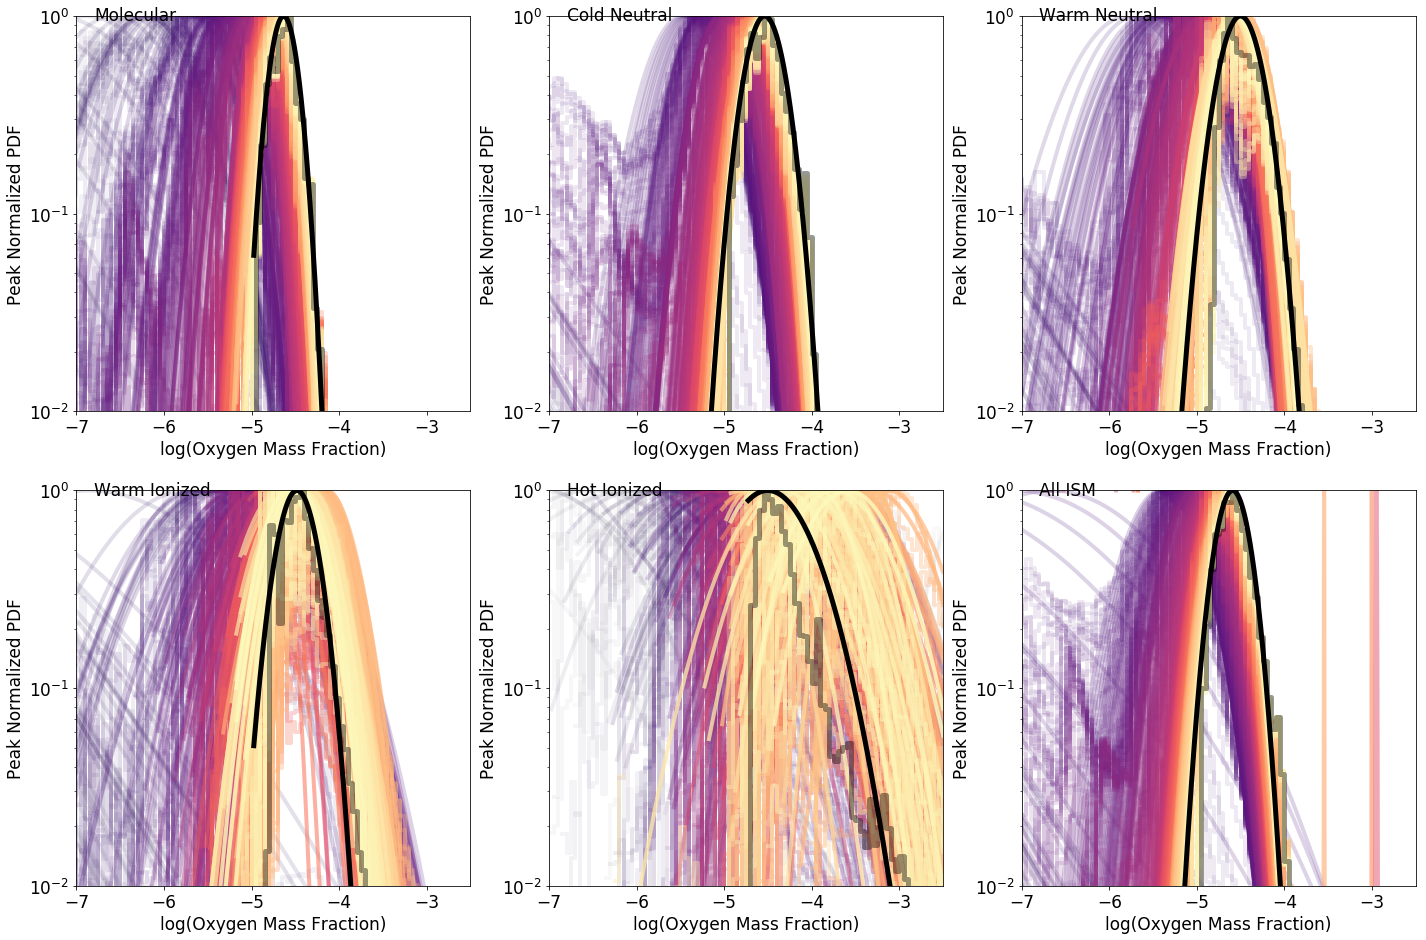

In [37]:
nrow = 2
ncol = 3

fig, all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(8*ncol,8*nrow)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

phase = 'Molecular'
field = 'O_Fraction'
ylim = [0.0,6]

ds_list = np.arange(46.0, 340, 1)

min_median = 1.0E80
max_median = -1.0E80

axi = 0
axj = 0
phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']
phase_labels = ['Molecular','Cold Neutral','Warm Neutral','Warm Ionized','Hot Ionized','All ISM']


mean_phase = {}
std_phase  = {}
actual_mean_phase = {}
actual_std_phase  = {}
time = np.zeros(np.size(ds_list))

for k in phases:
    mean_phase[k] = np.zeros(np.size(ds_list))
    std_phase[k]  = np.zeros(np.size(ds_list))
    actual_mean_phase[k] = np.zeros(np.size(ds_list))
    actual_std_phase[k]  = np.zeros(np.size(ds_list))


xmin = 10000
xmax = -1000000
for i,j in enumerate(ds_list):
    dsname = 'DD%0004i'%(j)
    axi = 0
    axj = 0
    for ip, phase in enumerate(phases):
       # print axi, axj, phase
        ax = all_ax[(axi, axj)]
        
        y = data[dsname][phase]['mass_fraction'][field]['hist']
        mean = data[dsname][phase]['mass_fraction'][field]['mean']
        std = data[dsname][phase]['mass_fraction'][field]['std']
        median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        label = data[dsname]['general']['Time'] - 46.0
    
    
        min_median = np.min([median, min_median])
        max_median = np.max([median, max_median])
    
        frac = 0.8
        alpha = ((i / (np.size(ds_list)*1.0))) * frac
        halpha = ((i / (np.size(ds_list)*1.0))) * frac * 0.5
        color = magma(alpha/frac) #'black' # viridis(alpha)
        lw   = 4.0
        hlw  = 4.0
        if j == np.max(ds_list):
            color = 'black'
            alpha = 1.0
            lw    = 5.0
            hlw   = 5.0
    
        norm_y = y / binsize
        plot_bins = np.log10(fbins)
        plot_histogram(ax, plot_bins, norm_y/np.max(norm_y), lw = hlw, color = color, alpha = halpha)

        selection = (y > 0) * (centers > 10**(median - 4)) * (centers < 10**(median+4))
        fit_x     = centers[selection]
        y_to_fit  = norm_y[selection]
    
        # take initial guess parameters from distribution values - compute logged dist values
        try:
            u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
            std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            lognorm    = functions.lognormal()
            popt, pcov = lognorm.fit_function(fit_x, y_to_fit, p0 = [u_guess, std_guess])     
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            yplot = lognorm._f(xplot, *popt)
            ax.plot(np.log10(xplot), yplot/np.max(yplot), lw = lw, color = color , ls = '-', alpha = alpha) #, label = 'Fit')     
        except:
            print phase, dsname, 'failure'
            popt = [None, None]
            
        mean_phase[phase][i] = popt[0]
        actual_mean_phase[phase][i] = mean
        std_phase[phase][i]  = popt[1]
        actual_std_phase[phase][i]  = std
        time[i]              = label
        
        axj = axj + 1
        
        if axj >= ncol:
            axi = axi + 1
            axj = 0
        

        xmin = np.min([np.log10(xplot[0]),xmin])
        xmax = np.max([np.log10(xplot[-1]),xmax])
        
        
for i in np.arange(2):
    for j in np.arange(3):
        all_ax[(i,j)].set_xlim(xmax - 5, xmax)
        all_ax[(i,j)].semilogy()
        all_ax[(i,j)].set_ylim(1.0E-2,1.0)

        ba =  8
        ba = 0
        all_ax[(i,j)].set_xlim(-7 - ba, -2.5 - ba)   

        xy = (np.min(all_ax[(i,j)].get_xlim())+ 0.2,np.max(all_ax[(i,j)].get_ylim())*0.95)
        all_ax[(i,j)].annotate(phase_labels[(3)*(i) + j], xy = xy, xytext=xy)
        all_ax[(i,j)].set_xlabel(r'log(Oxygen Mass Fraction)')
        all_ax[(i,j)].set_ylabel(r'Peak Normalized PDF')
    #ax.set_xlim( np.log10(min_median) - 2, np.log10(max_median) + 2)

#fig.savefig(field + '_phase_evolution.png')

fig.savefig('log_panel_phase_evolution.png')

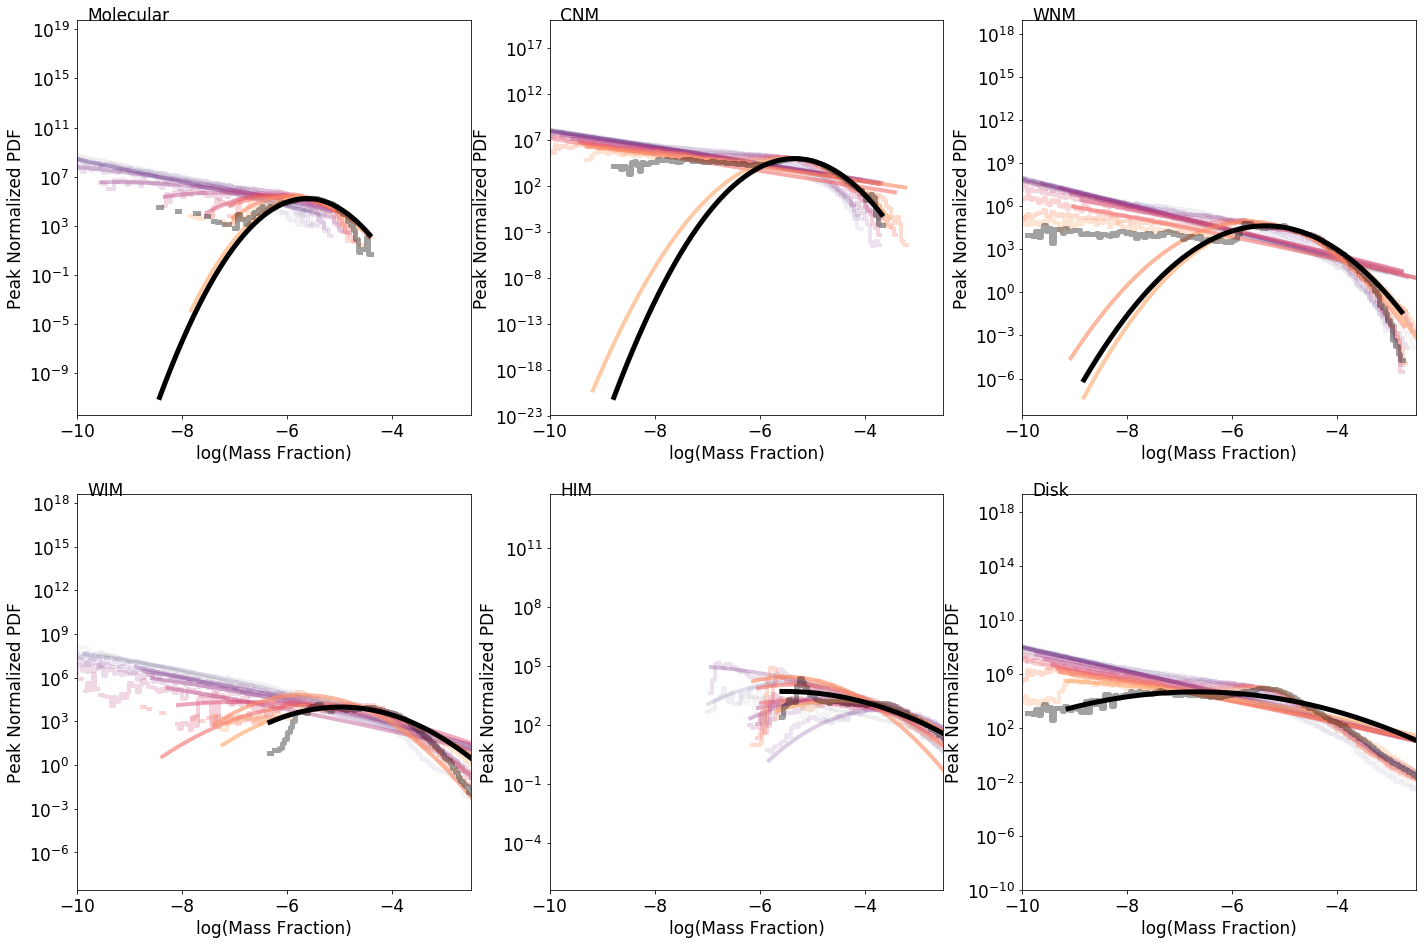

In [16]:
nrow = 2
ncol = 3

fig, all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(8*ncol,8*nrow)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

phase = 'Molecular'
field = 'O_Fraction'
ylim = [0.0,6]

ds_list = np.arange(60, 120, 5)

min_median = 1.0E80
max_median = -1.0E80

axi = 0
axj = 0
phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']


mean_phase = {}
std_phase  = {}
actual_mean_phase = {}
actual_std_phase  = {}
time = np.zeros(np.size(ds_list))

for k in phases:
    mean_phase[k] = np.zeros(np.size(ds_list))
    std_phase[k]  = np.zeros(np.size(ds_list))
    actual_mean_phase[k] = np.zeros(np.size(ds_list))
    actual_std_phase[k]  = np.zeros(np.size(ds_list))


xmin = 10000
xmax = -1000000
for i,j in enumerate(ds_list):
    dsname = 'DD%0004i'%(j)
    axi = 0
    axj = 0
    for ip, phase in enumerate(phases):
       # print axi, axj, phase
        ax = all_ax[(axi, axj)]
        
        y = data[dsname][phase]['mass_fraction'][field]['hist']
        mean = data[dsname][phase]['mass_fraction'][field]['mean']
        std = data[dsname][phase]['mass_fraction'][field]['std']
        median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        label = data[dsname]['general']['Time'] - 46.0
    
    
        min_median = np.min([median, min_median])
        max_median = np.max([median, max_median])
    
        frac = 0.8
        alpha = ((i / (np.size(ds_list)*1.0))) * frac
        halpha = ((i / (np.size(ds_list)*1.0))) * frac * 0.5
        color = magma(alpha/frac) #'black' # viridis(alpha)
        lw   = 4.0
        hlw  = 4.0
        if j == np.max(ds_list):
            color = 'black'
            alpha = 1.0
            lw    = 5.0
            hlw   = 5.0
    
        norm_y = y / binsize
        plot_bins = np.log10(fbins)
        norm = np.max(norm_y)
        norm = 1.0
        plot_histogram(ax, plot_bins, norm_y/norm, lw = hlw, color = color, alpha = halpha)

        selection = (y > 0) * (centers > 10**(median - 4)) * (centers < 10**(median+4))
        fit_x     = centers[selection]
        y_to_fit  = norm_y[selection]
    
        # take initial guess parameters from distribution values - compute logged dist values
        u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
        std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
        xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)

        try:
            lognorm    = functions.lognormal()
            popt, pcov = lognorm.fit_function(fit_x, y_to_fit, p0 = [u_guess, std_guess])     
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            yplot = lognorm._f(xplot, *popt)
            
            norm = np.max(yplot)
            norm = 1.0
            ax.plot(np.log10(xplot), yplot/norm, lw = lw, color = color , ls = '-', alpha = alpha) #, label = 'Fit')     
        except:
            print phase, dsname, 'failure'
            popt = [None, None]
            
        mean_phase[phase][i] = popt[0]
        actual_mean_phase[phase][i] = mean
        std_phase[phase][i]  = popt[1]
        actual_std_phase[phase][i]  = std
        time[i]              = label
        
        axj = axj + 1
        
        if axj >= ncol:
            axi = axi + 1
            axj = 0
        

        xmin = np.min([np.log10(xplot[0]),xmin])
        xmax = np.max([np.log10(xplot[-1]),xmax])
        
        
for i in np.arange(2):
    for j in np.arange(3):
        all_ax[(i,j)].set_xlim(xmax - 5, xmax)
        #all_ax[(i,j)].set_ylim(1.0E-4,1.0)
        all_ax[(i,j)].semilogy()
        ba =  8
        ba = 0
        all_ax[(i,j)].set_xlim(-10 - ba, -2.5 - ba)   

        xy = (np.min(all_ax[(i,j)].get_xlim())+ 0.2,np.max(all_ax[(i,j)].get_ylim())*0.95)
        all_ax[(i,j)].annotate(phases[(3)*(i) + j], xy = xy, xytext=xy)
        all_ax[(i,j)].set_xlabel(r'log(Mass Fraction)')
        all_ax[(i,j)].set_ylabel(r'Peak Normalized PDF')
    #ax.set_xlim( np.log10(min_median) - 2, np.log10(max_median) + 2)

fig.savefig(field + '_phase_evolution.png')

In [17]:
time

array([ 13.99999461,  18.99999241,  23.99999574,  28.99999265,
        33.99999766,  38.99999479,  43.99999265,  48.99999002,
        53.99999051,  58.99999158,  63.99999229,  68.9999933 ])

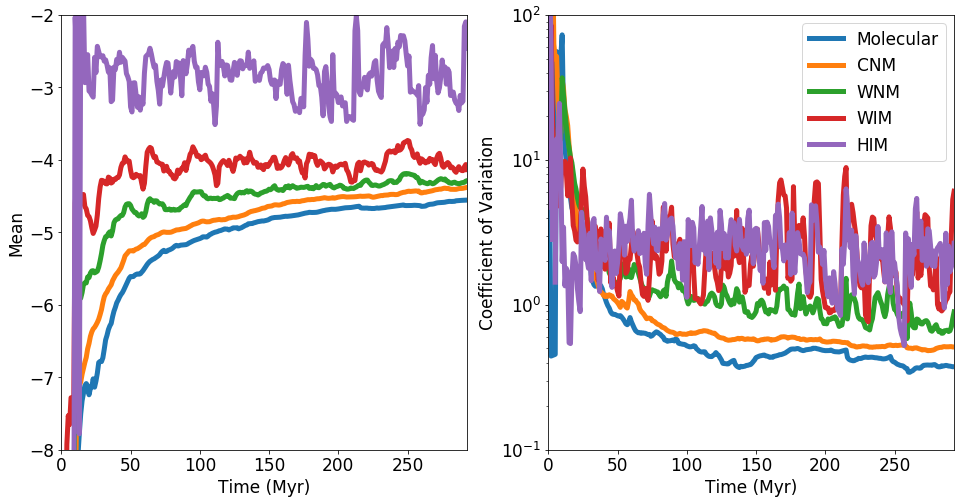

In [80]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

for i, phase in enumerate(phases):
    if phase == 'Disk':
        continue
    mean  = actual_mean_phase[phase]
    std  = actual_std_phase[phase]
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[0].plot(time, np.log10(mean), lw = 5, ls = '-')
    ax[1].plot(time, std / mean,  lw = 5, ls = '-', label = phase)

    ax[0].set_ylabel(r'Mean')
    ax[1].set_ylabel(r'Coefficient of Variation')
    
for a in [ax[0],ax[1]]:
    a.set_xlim(0.0, np.max(time))
    a.set_xlabel('Time (Myr)')
ax[1].semilogy()
ax[0].set_ylim(-8, -2)
ax[1].set_ylim(1.0E-1, 100.0)

    
    
ax[1].legend(loc='best')
fig.savefig('phase_mean_var_from_distribution.png')

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


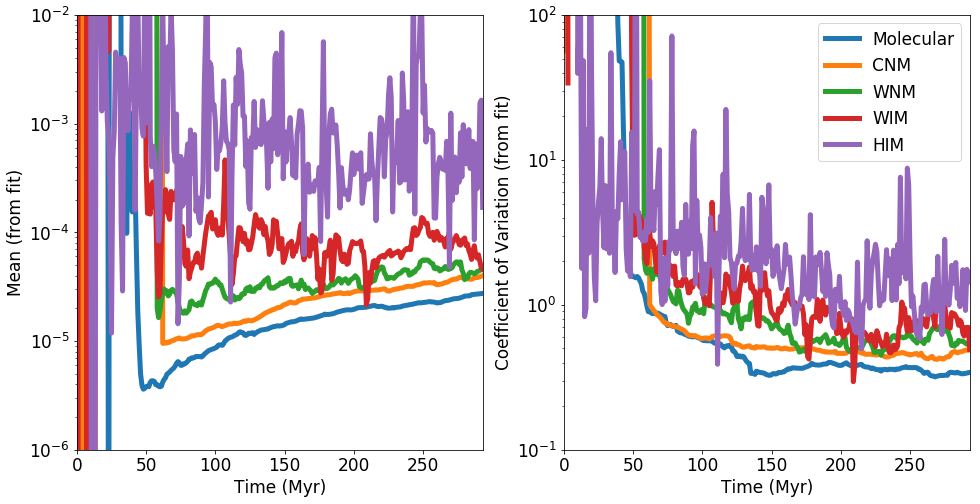

In [39]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

for i, phase in enumerate(phases):
    if phase == 'Disk':
        continue
    M  = mean_phase[phase]
    S  = std_phase[phase]
    
    mean = np.exp(M + 0.5*S**2)
    std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[0].plot(time, mean, lw = 5, ls = '-')
    ax[1].plot(time, std / mean,  lw = 5, ls = '-', label = phase)

    ax[0].set_ylabel(r'Mean (from fit)')
    ax[1].set_ylabel(r'Coefficient of Variation (from fit)')
    
for a in [ax[0],ax[1]]:
    a.set_xlim(0.0, np.max(time))
    a.set_xlabel('Time (Myr)')
    a.semilogy()
ax[0].set_ylim(1.0E-6, 1.0E-2)
ax[1].set_ylim(0.1, 100.0)

    
    
ax[1].legend(loc='best')

fig.savefig('phase_mean_var_from_fit.png')

In [40]:
ptimes = ds_list # in Myr
dt = 100.0

bins = np.arange(-15,-2, 0.2)

all_hist = {}

for i, t in enumerate(ptimes):
    selection = ptypes.select_formed_stars(gal.ds, gal.df, np.max([t - dt, 0.0]), 
                                                             np.min([t + dt, np.max(ptimes)]))
    
    ydata = np.log10(gal.df['particle_O_fraction'][selection])
    hist, bins = np.histogram(ydata, bins = bins)
    hist = hist / (10**(bins[1:]) - 10**(bins[:-1])) / (1.0 * np.size(ydata)) # normalize to PDF
    
    all_hist[t] = hist


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


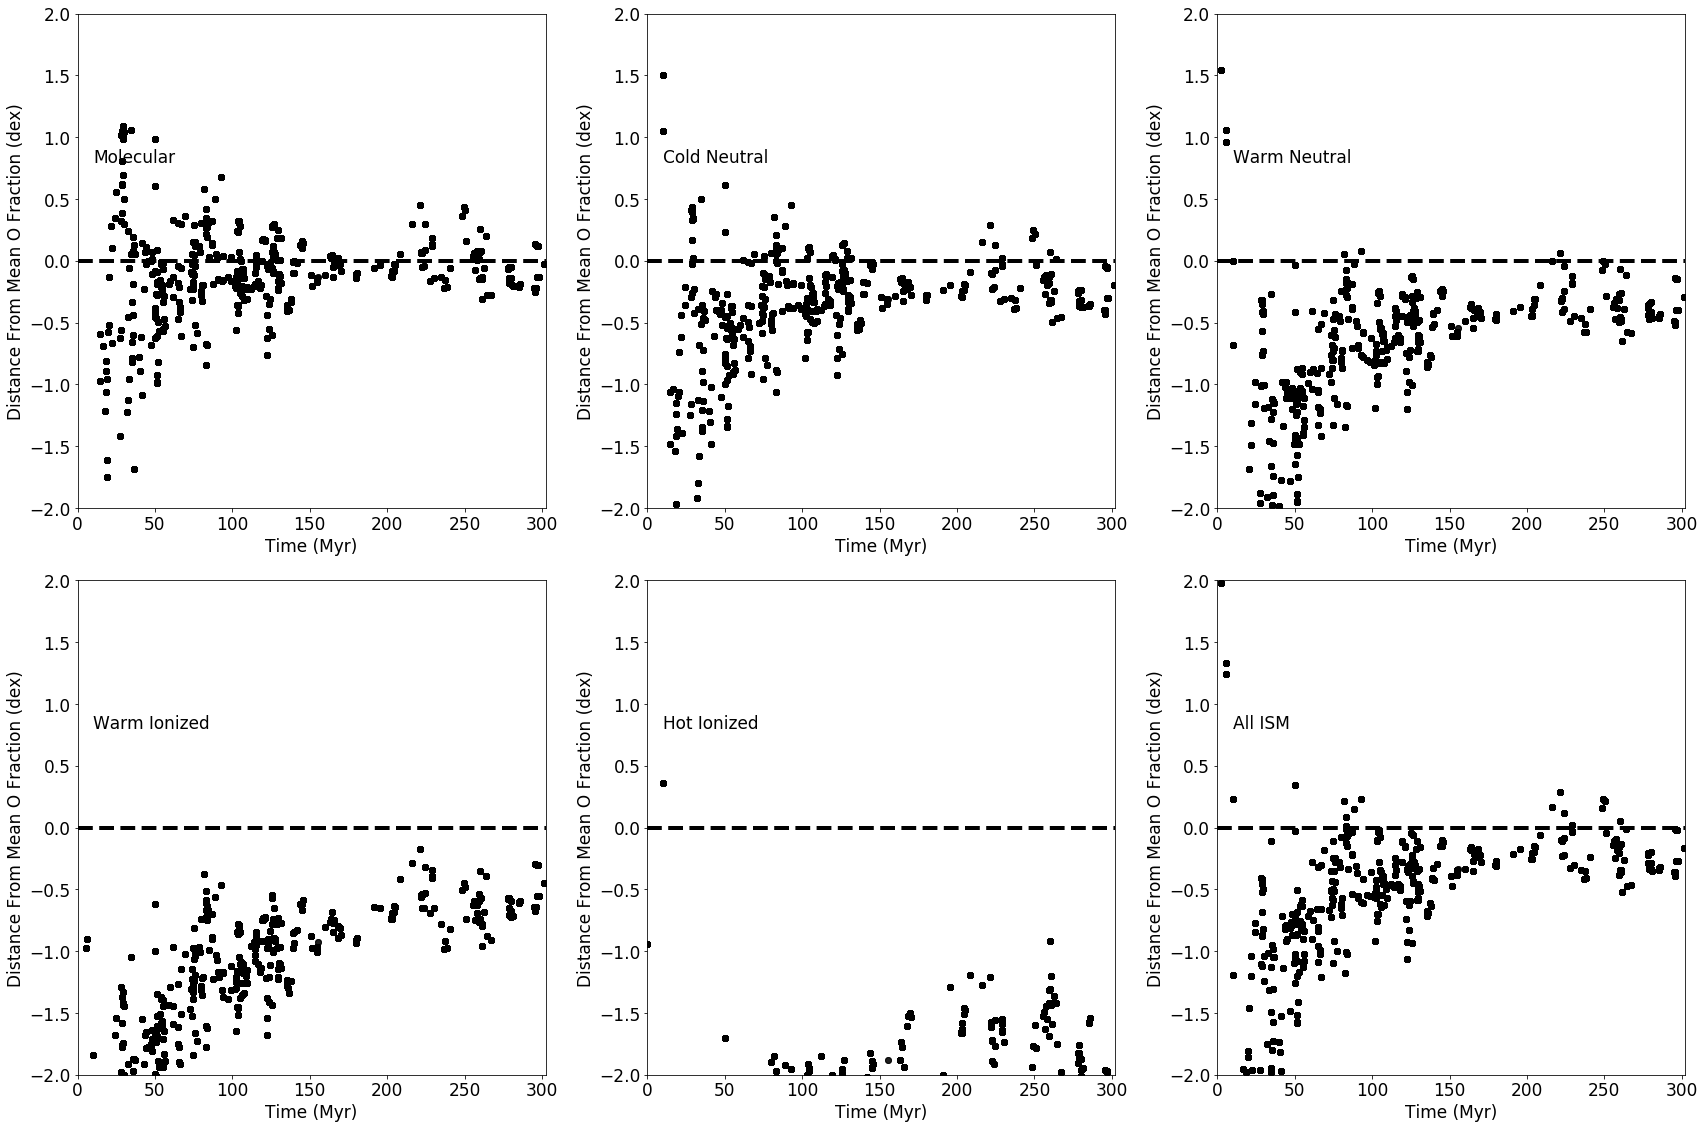

In [77]:
t_o    = gal.df['creation_time'].convert_to_units('Myr')
xdata  = time + 46.0

fig, all_axes = plt.subplots(2,3)
fig.set_size_inches(24,16)

axi = axj = 0
for i,phase in enumerate(['Molecular','CNM','WNM','WIM','HIM','Disk']):
    ax = all_axes[(axi,axj)]
    xdata  = time + 46.0

    mean = actual_mean_phase[phase]
    std  = actual_std_phase[phase]

#mean = np.exp(mol_mean + 0.5*mol_std**2)
#std  = np.sqrt(np.exp(mol_std**2 + 2.0 * mol_mean)*(np.exp(mol_std*mol_std) - 1.0))

    xdata = xdata[std>0]
    mean = mean[std>0]
    std  = std[std>0]

    # number of standard deviations away from mean for each star
    sigma_stars = (np.log10(gal.df['particle_O_fraction']) - np.log10(np.interp(t_o, xdata, mean))) #/ np.interp(t_o, xdata, std)

    x = gal.df[('io','particle_Fe_over_H')]
    ax.scatter(t_o - np.min(t_o), sigma_stars, alpha = 0.5, color = 'black')
    ax.set_xlim(np.min(t_o-np.min(t_o)), np.max(t_o-np.min(t_o)))
    #ax.set_xlim(-8,0)
    ax.set_ylim(-2,2)
    ax.plot(ax.get_xlim(), [0.0,0.0], color = 'black', lw = 4, ls = '--')
    ax.set_ylabel('Distance From Mean O Fraction (dex)')
    ax.set_xlabel('Time (Myr)')
    
    xy = (10.0, ax.get_ylim()[1] - 0.2)
    ax.annotate(phase_labels[i], xy=xy,xytext=xy)
    
    axj = axj + 1
    if axj >= 3:
        axj = 0
        axi = axi + 1
plt.tight_layout()
fig.savefig('stellar_distance_to_mean.png')

In [53]:
np.max(gal.df['particle_O_fraction'])

6.33349351965e-05 dimensionless

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for i in [150, 200, 250, 300]:
    plot_histogram(ax, bins, all_hist[i] , lw = 3)
 #   print i, all_hist[i]
ax.set_xlabel('log(O Fraction)')
ax.set_ylabel('PDF')
ax.set_xlim(-8,-3)
ax.semilogy()

In [ ]:
    lognorm?
